#💻 Laptop Price Analysis using Pandas, Matplotlib & Seaborn

##This project explores a dataset of laptops and their specifications, using Python's data analytics and visualization libraries. The goal is to identify how various features (like RAM, screen size, OS, etc.) affect the laptop's price.


## 1. Importing Libraries & Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv("laptopData.csv")
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298.0,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300.0,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


## 2. Initial Data Exploration


In [4]:
df.head(10)
df.sample(5)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
686,686.0,HP,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4GB,500GB HDD,AMD Radeon 520,Windows 10,1.86kg,32639.8608
655,655.0,Toshiba,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,500GB HDD,Intel HD Graphics 620,Windows 10,2.0kg,56689.9200
423,423.0,Asus,Notebook,35.6,Full HD 1920x1080,Intel Core i3 7100U 2.4GHz,8GB,1TB HDD,Nvidia GeForce 940MX,Linux,2.3kg,31808.1600
226,226.0,Dell,Notebook,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,16GB,1TB HDD,AMD Radeon R7 M445,Windows 10,2.3kg,45768.0528
1214,1214.0,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.9kg,103842.7200


In [5]:
df.describe()

,Unnamed: 0,Price
count,1273.000000,1273.000000
mean,652.674784,59955.814073
std,376.493027,37332.251005
min,0.000000,9270.720000
25%,327.000000,31914.720000
50%,652.000000,52161.120000
75%,980.000000,79333.387200
max,1302.000000,324954.720000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1273 non-null   float64
 1   Company           1273 non-null   object 
 2   TypeName          1273 non-null   object 
 3   Inches            1273 non-null   object 
 4   ScreenResolution  1273 non-null   object 
 5   Cpu               1273 non-null   object 
 6   Ram               1273 non-null   object 
 7   Memory            1273 non-null   object 
 8   Gpu               1273 non-null   object 
 9   OpSys             1273 non-null   object 
 10  Weight            1273 non-null   object 
 11  Price             1273 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


## 3. Data Cleaning

In [7]:
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [8]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   object 
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   object 
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   object 
 10  Price             1273 non-null   float64
dtypes: float64(1), object(10)
memory usage: 112.1+ KB


In [9]:
df.shape
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [10]:
df.duplicated().sum()



np.int64(58)

In [82]:

df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [12]:
df.isnull().sum()
df.dropna(inplace=True)

In [84]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price_USD', 'Price_Category',
       'cpu_brand', 'Touchscreen', 'Storage_Type'],
      dtype='object')

###convert Ram from strings (like “8GB”) to integer values.

In [14]:
print(df['Ram'].isnull().sum())
df['Ram'].dtype


0


dtype('O')

In [15]:
df.dtypes

,0
Company,object
TypeName,object
Inches,object
ScreenResolution,object
Cpu,object
Ram,object
Memory,object
Gpu,object
OpSys,object
Weight,object


### Convert Ram,Weight,Inched column object into string then Integer or float
#####Then convert the column to integer, handling any errors during conversion by turning them into NaN

In [16]:

df['Ram'] = df['Ram'].astype(str).str.replace('GB', '', regex=False)

df['Ram'] = pd.to_numeric(df['Ram'], errors='coerce')
df['Weight'] = df['Weight'].str.replace('kg', '', regex=False)
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce')
df.dropna(subset=['Weight'], inplace=True)
df['Weight'] = df['Weight'].astype(float)
df['Inches'] = pd.to_numeric(df['Inches'], errors='coerce')
df.dropna(subset=['Inches'], inplace=True)
df['Inches'] = df['Inches'].astype(float)



##Filtering & Selection
🔹 Filter laptops with Price > $1500.
🔹 Filter laptops with RAM ≥ 16GB.
🔹 Filter laptops made by “Apple”.
🔹 Get laptops that have an “i7”

We are convert Indian Rupees  into USD Dollars anf remove Price column for better results for only need One Price Rupees or Price in USD

In [17]:
df['Price_USD']=df['Price'] *  0.01167

In [18]:
df.drop(columns=['Price'], axis=1, inplace=True)

In [20]:
df[df['Price_USD'] > 1500][[ 'Company','TypeName']]

,Company,TypeName
3,Apple,Ultrabook
12,Apple,Ultrabook
17,Apple,Ultrabook
58,MSI,Gaming
177,MSI,Gaming
...,...,...
1140,Lenovo,2 in 1 Convertible
1189,Acer,Gaming
1203,Dell,Ultrabook
1209,Asus,Gaming


In [21]:
df[df['Ram'] > 16][['Company','TypeName']]


,Company,TypeName
71,Dell,Ultrabook
177,MSI,Gaming
196,Razer,Gaming
238,Asus,Gaming
329,Dell,Notebook
438,Lenovo,Ultrabook
491,Toshiba,Ultrabook
494,Asus,Gaming
517,Asus,Gaming
577,Lenovo,Gaming


In [22]:
df[df['Company'] == 'Apple'][['Company','TypeName']]

,Company,TypeName
0,Apple,Ultrabook
1,Apple,Ultrabook
3,Apple,Ultrabook
4,Apple,Ultrabook
6,Apple,Ultrabook
7,Apple,Ultrabook
12,Apple,Ultrabook
14,Apple,Ultrabook
15,Apple,Ultrabook
17,Apple,Ultrabook


In [23]:
df[df['Cpu'].str.contains('Intel Core i7', case=False, na=False)]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_USD
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,1577.729571
6,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,1330.585411
8,Asus,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Nvidia GeForce MX150,Windows 10,1.30,929.557512
12,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.8GHz,16,256GB SSD,AMD Radeon Pro 555,macOS,1.83,1517.118691
16,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,AMD Radeon R5 M430,Windows 10,2.20,463.224312
...,...,...,...,...,...,...,...,...,...,...,...
1267,Dell,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8,1TB HDD,AMD Radeon R5 M430,Linux,2.30,501.146528
1269,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4,500GB HDD,Nvidia GeForce 920M,Windows 10,2.20,447.878841
1270,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,396.694109
1271,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,932.044622


###Feature Engineering

####Create a new column Weight_kg by removing “kg” text and converting Weight to float.
 Create a Price_Category:

 Budget” for Price <700$

 Midrange” for 700–1200 $

 Premium” for >1200 $



In [25]:
df['Price_Category'] = pd.cut(df['Price_USD'], bins=[0, 700, 1200, float('inf')],labels=['Budget', 'Midrange', 'Premium'])
df['cpu_brand']=df['Cpu'].str.split().str[0]
df['Touchscreen'] = df['ScreenResolution'].str.contains('Touchscreen', case=False, na=False)
df[df['Touchscreen'] == True][['Company','TypeName']]


,Company,TypeName
19,Dell,Ultrabook
23,Dell,2 in 1 Convertible
33,Dell,Ultrabook
44,Dell,2 in 1 Convertible
70,Microsoft,Ultrabook
...,...,...
1243,Dell,2 in 1 Convertible
1249,Dell,2 in 1 Convertible
1260,Lenovo,2 in 1 Convertible
1270,Lenovo,2 in 1 Convertible


###Separeting memory into SSD,HDD ang Hybrid

In [29]:
def storage_type(memory):
    memory = str(memory).lower()
    if 'ssd' in memory and 'hdd' in memory:
        return 'Hybrid'
    elif 'ssd' in memory:
        return 'SSD'
    elif 'hdd' in memory:
        return 'HDD'
    else:
        return 'Other'

df['Storage_Type'] = df['Memory'].apply(storage_type)


### # aggregetion Pandas Operations

In [27]:
df.groupby('Company')['Price_USD'].mean()

,Price_USD
Company,
Acer,393.874009
Apple,972.583634
Asus,703.823950
Chuwi,195.422627
Dell,743.213863
Fujitsu,450.166982
Google,1043.135554
HP,675.815669
Huawei,885.411302


In [28]:
df.groupby('Company')['Price_USD'].max()


,Price_USD
Company,
Acer,1615.999982
Apple,1777.040381
Asus,2471.565960
Chuwi,279.178142
Dell,2275.332949
Fujitsu,496.800302
Google,1367.288942
HP,2728.981886
Huawei,932.044622


In [31]:
num = len(df['Company'].unique().tolist())
print(num)

19


In [32]:
df['Company'].unique().tolist()

['Apple',
 'HP',
 'Acer',
 'Asus',
 'Dell',
 'Lenovo',
 'Chuwi',
 'MSI',
 'Microsoft',
 'Toshiba',
 'Huawei',
 'Xiaomi',
 'Vero',
 'Razer',
 'Mediacom',
 'Samsung',
 'Google',
 'Fujitsu',
 'LG']

In [33]:
df['Company'].value_counts()

,count
Company,
Lenovo,282
Dell,279
HP,260
Asus,149
Acer,101
MSI,53
Toshiba,47
Apple,21
Samsung,9


In [34]:
df.groupby('Company')['Price_USD'].min()


,Price_USD
Company,
Acer,108.189302
Apple,558.940756
Asus,123.733742
Chuwi,152.329294
Dell,170.926662
Fujitsu,403.533662
Google,792.766440
HP,129.951518
Huawei,838.777982


In [35]:
df['Price_Category'].value_counts()



,count
Price_Category,
Budget,722
Midrange,368
Premium,152


#Visualization (Univariate Analysis):-
##Univariate Analysis
###How many laptops are from each company:-

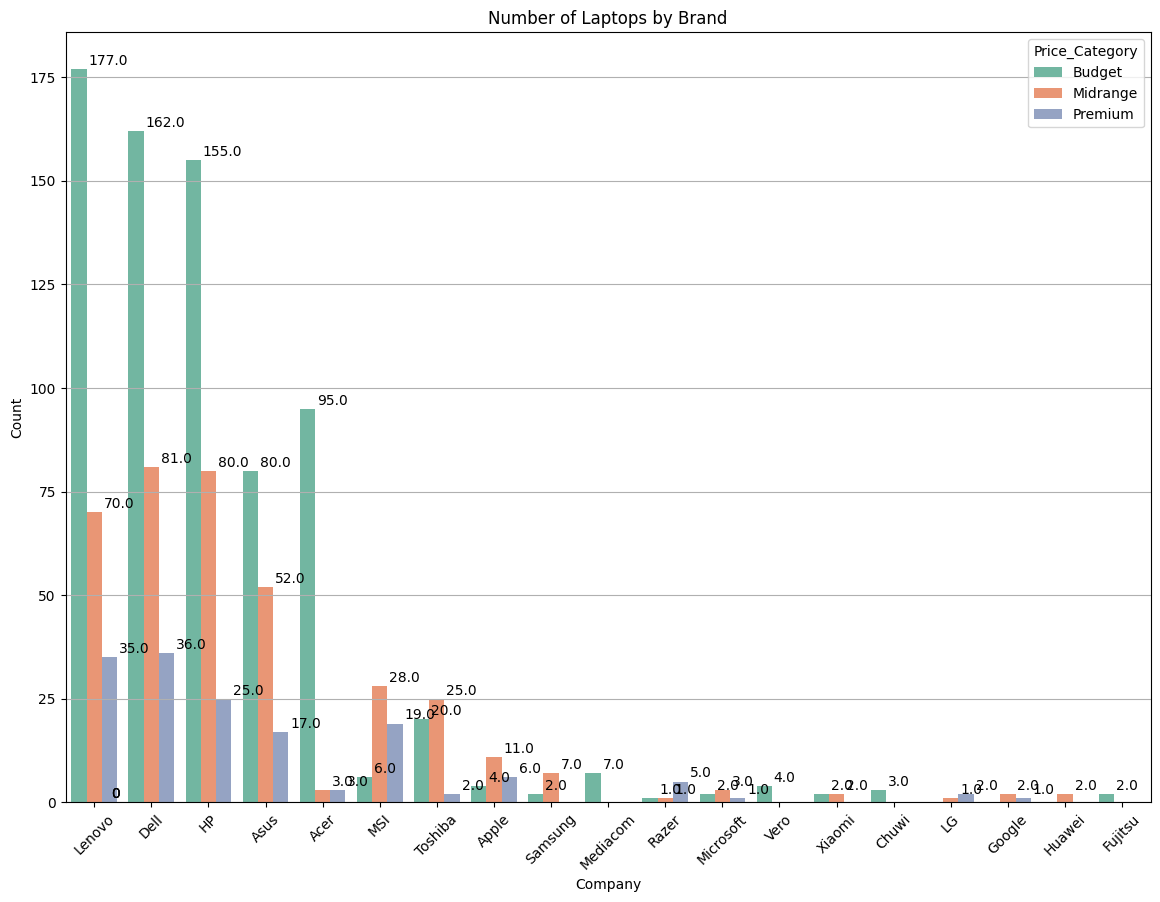

In [44]:
plt.figure(figsize=(14, 10))
ax=sns.countplot(x='Company', data=df, order=df['Company'].value_counts().index,hue='Price_Category', palette='Set2')
plt.title('Number of Laptops by Brand')
plt.xlabel('Company')
plt.ylabel('Count')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.savefig("countplot1.png", dpi=300, bbox_inches='tight')

for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x() + 0.3, p.get_height() + 1))
plt.show()

###Operating System vs Company

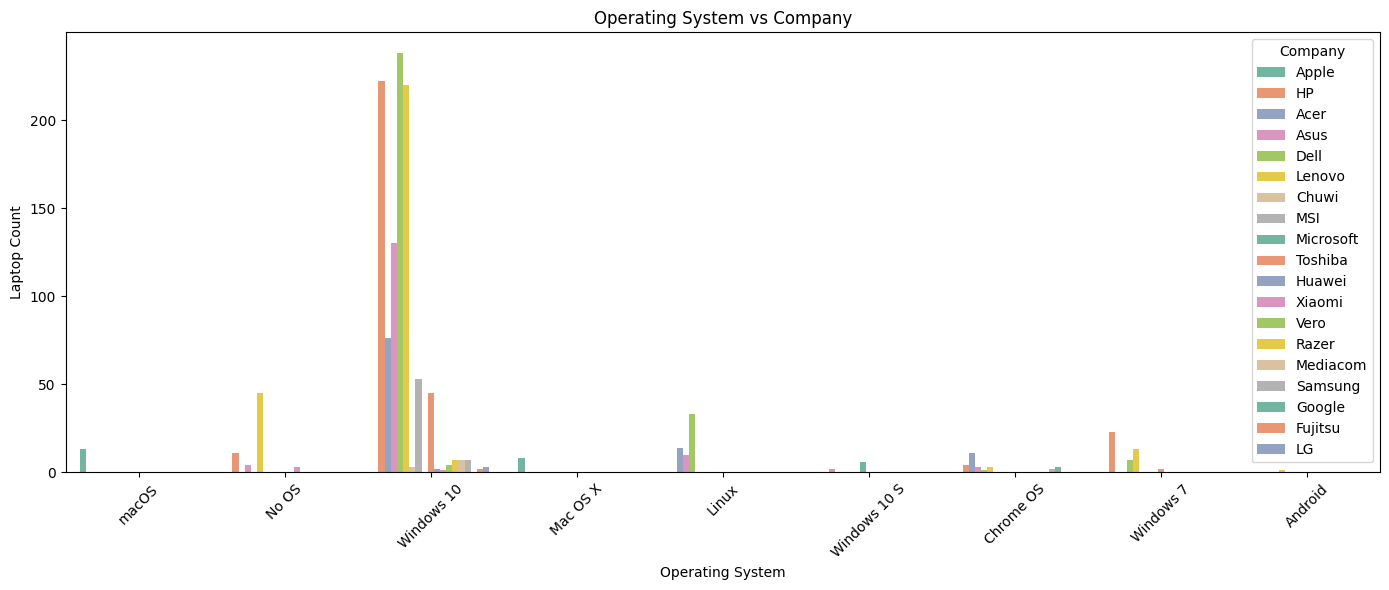

In [43]:
plt.figure(figsize=(14, 6))
sns.countplot(
    x='OpSys',
    data=df,
    hue='Company',
    palette='Set2'
)
plt.title('Operating System vs Company')
plt.xlabel('Operating System')
plt.ylabel('Laptop Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("countplot2.png", dpi=300, bbox_inches='tight')
plt.show()

###RAM Size vs Price Category

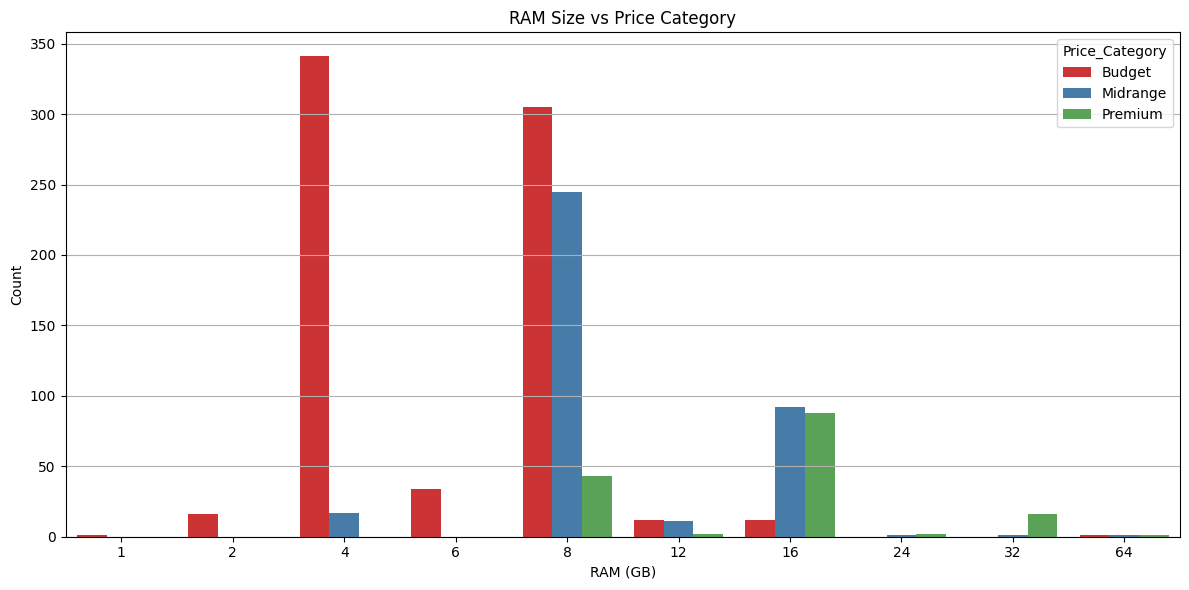

In [45]:
plt.figure(figsize=(12, 6))
sns.countplot(
    x='Ram',
    data=df,
    hue='Price_Category',
    palette='Set1'
)
plt.title('RAM Size vs Price Category')
plt.xlabel('RAM (GB)')
plt.ylabel('Count')
plt.grid(axis='y')
plt.tight_layout()
plt.savefig("countplot3.png", dpi=300, bbox_inches='tight')
plt.show()


### Touchscreen vs Non - Touch Laptops by Company

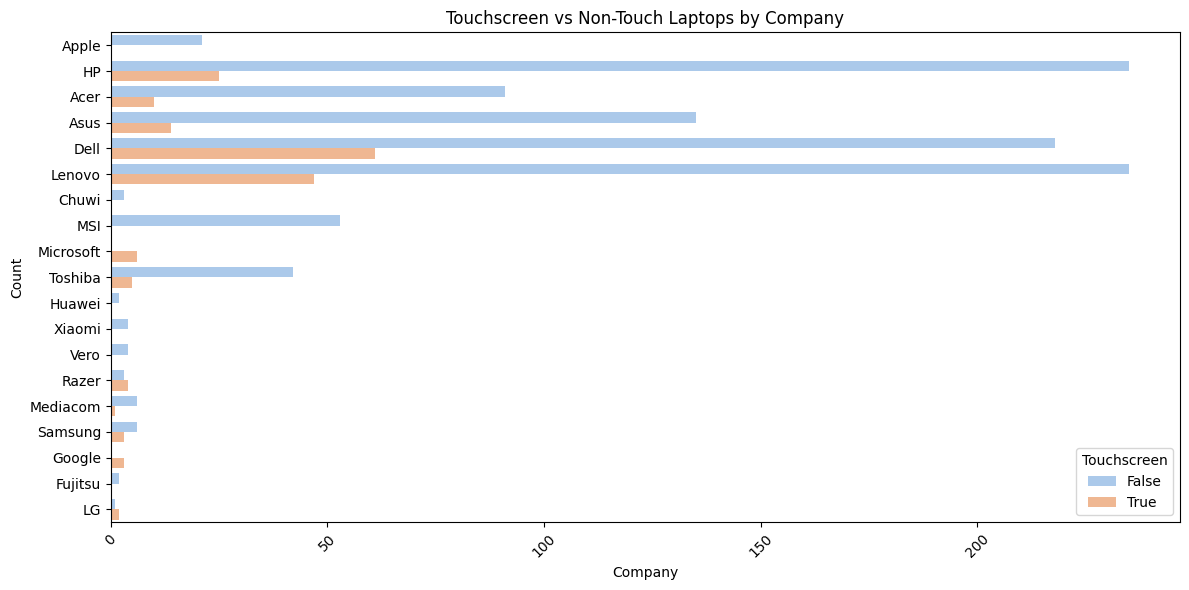

In [48]:
plt.figure(figsize=(12, 6))
sns.countplot(y='Company',hue='Touchscreen', data=df,palette='pastel')
plt.title('Touchscreen vs Non-Touch Laptops by Company')
plt.xlabel('Company')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("countplot4.png", dpi=300, bbox_inches='tight')
plt.show()


###What is the average price of laptops from each company:-

/tmp/ipython-input-47-2864335961.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Company', y='Price_USD', data=df, estimator=np.mean,palette='Set2')


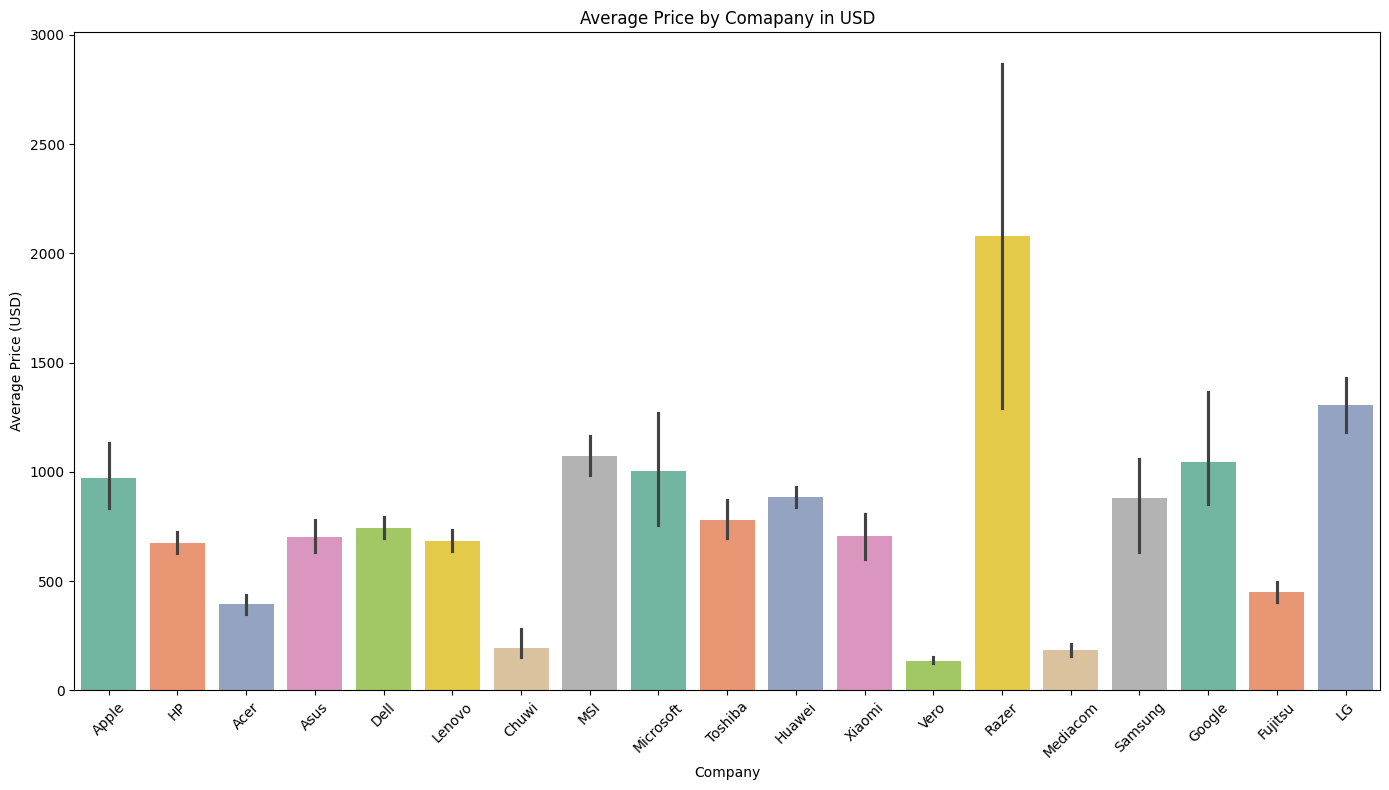

In [47]:
plt.figure(figsize=(14, 8))
sns.barplot(x='Company', y='Price_USD', data=df, estimator=np.mean,palette='Set2')
plt.title('Average Price by Comapany in USD')
plt.xlabel('Company')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("barplot1.png", dpi=300, bbox_inches='tight')
plt.show()


Razer companies have the expensive laptops on average And Vero companies have the cheapest laptops on average

###Which OS types are most commonly used?
""" Most used Operating System is Windows"""

/tmp/ipython-input-49-3608083637.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='OpSys', order=df['OpSys'].value_counts().index, palette='Set2')


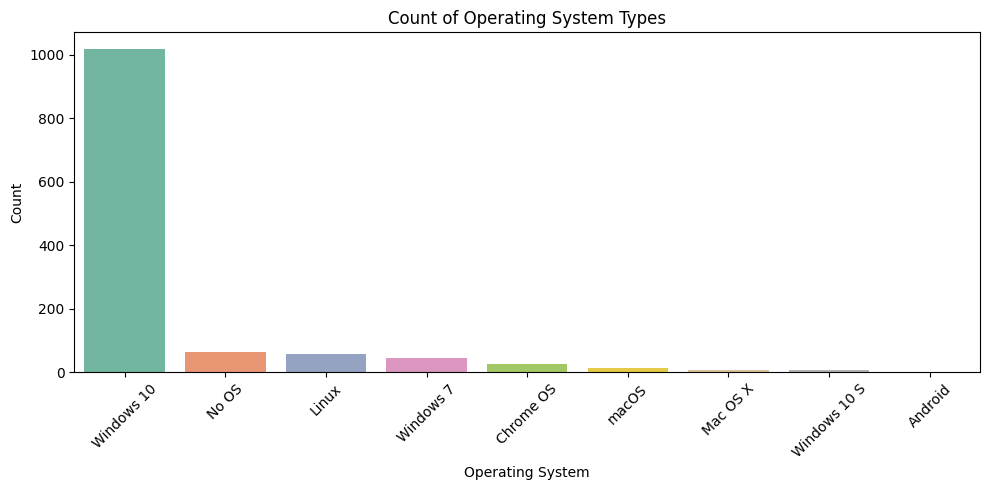

In [49]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='OpSys', order=df['OpSys'].value_counts().index, palette='Set2')
plt.title('Count of Operating System Types')
plt.xticks(rotation=45)
plt.xlabel('Operating System')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig("countplot5.png", dpi=300, bbox_inches='tight')
plt.show()

###Compare average prices for Intel vs AMD laptops samsung laptop:-


Intel has expensive price average and AMD has  cheapest  price average

/tmp/ipython-input-50-341025844.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cpu_brand',y='Price_USD',data=df,estimator=np.mean,palette='Set2')


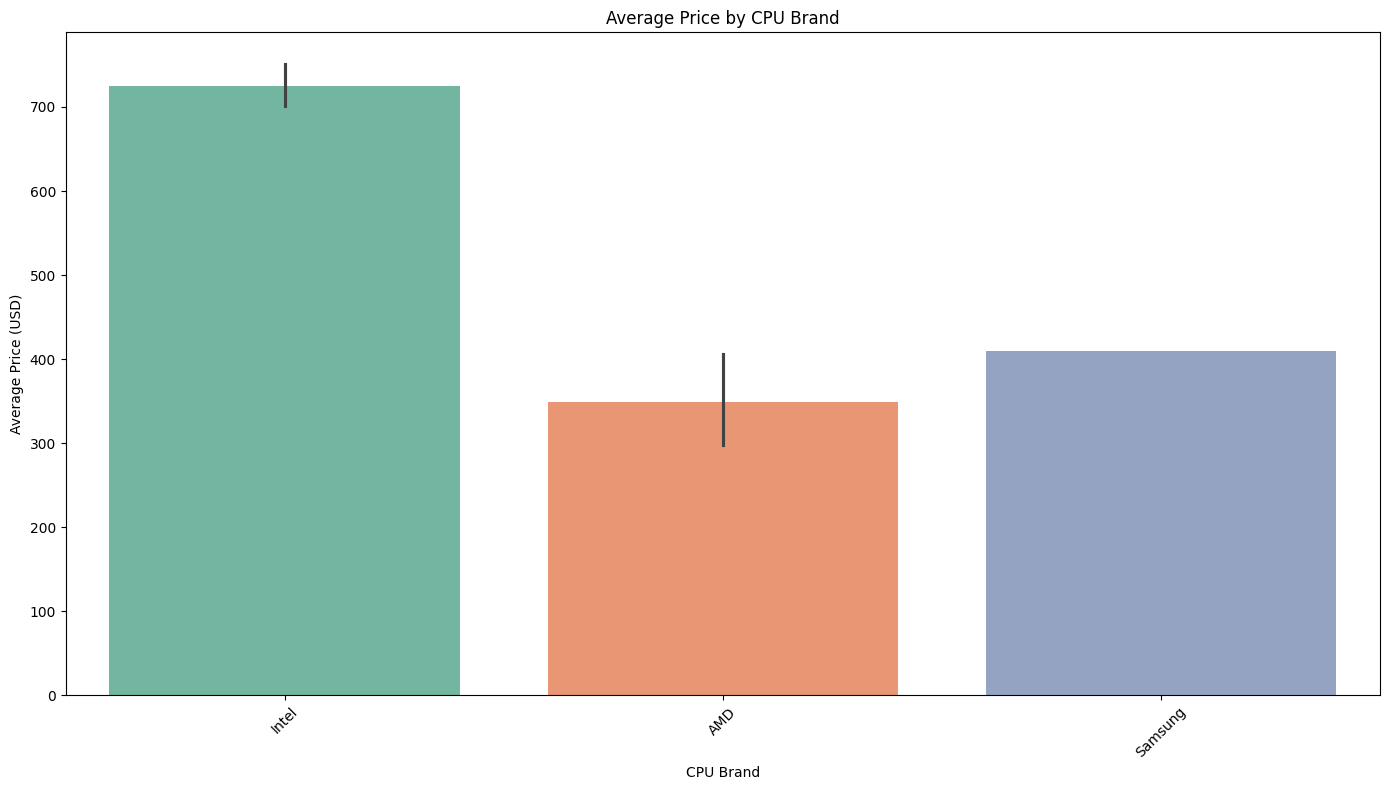

In [50]:
plt.figure(figsize=(14,8))
sns.barplot(x='cpu_brand',y='Price_USD',data=df,estimator=np.mean,palette='Set2')
plt.title('Average Price by CPU Brand')
plt.xlabel('CPU Brand')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("barplot2.png", dpi=300, bbox_inches='tight')
plt.show()

###Are SSD-based laptops more expensive than HDD or hybrid ones?
Hybrid based laptops more expensive than HDD and SDD

/tmp/ipython-input-51-1364363428.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Storage_Type', y='Price_USD', data=df, estimator=np.mean, palette='Set2')


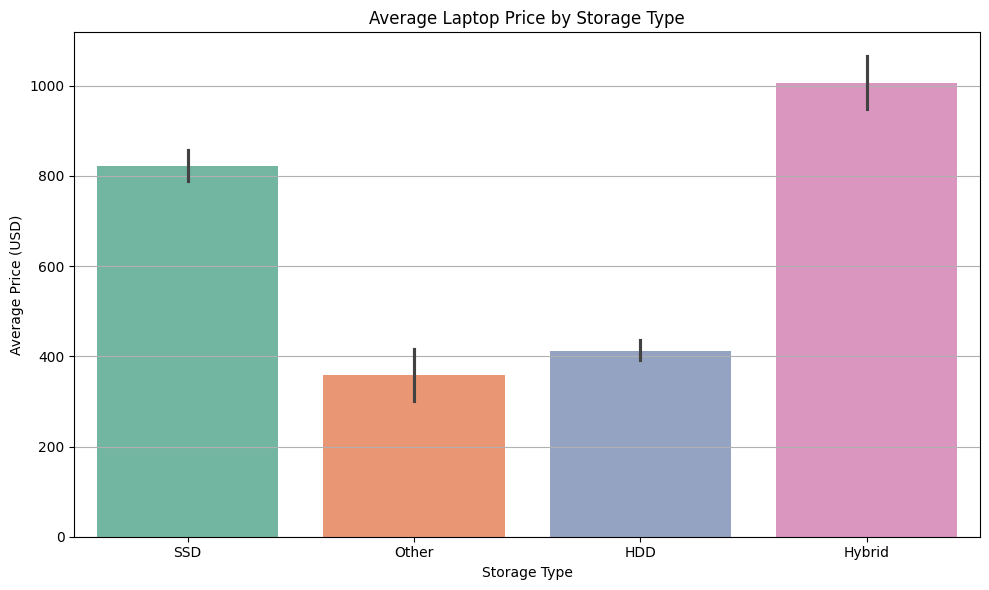

In [51]:
plt.figure(figsize=(10,6))
sns.barplot(x='Storage_Type', y='Price_USD', data=df, estimator=np.mean, palette='Set2')

plt.title('Average Laptop Price by Storage Type')
plt.xlabel('Storage Type')
plt.ylabel('Average Price (USD)')
plt.grid(axis='y')
plt.tight_layout()
plt.savefig("barplot3.png", dpi=300, bbox_inches='tight')
plt.show()


###How does laptop type (TypeName) affect price:-
   Are Notebooks cheaper on average than Ultrabooks and Do Gaming laptops have a higher median price

/tmp/ipython-input-52-3615786037.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='TypeName', y='Price_USD', data=df, palette='Set2')


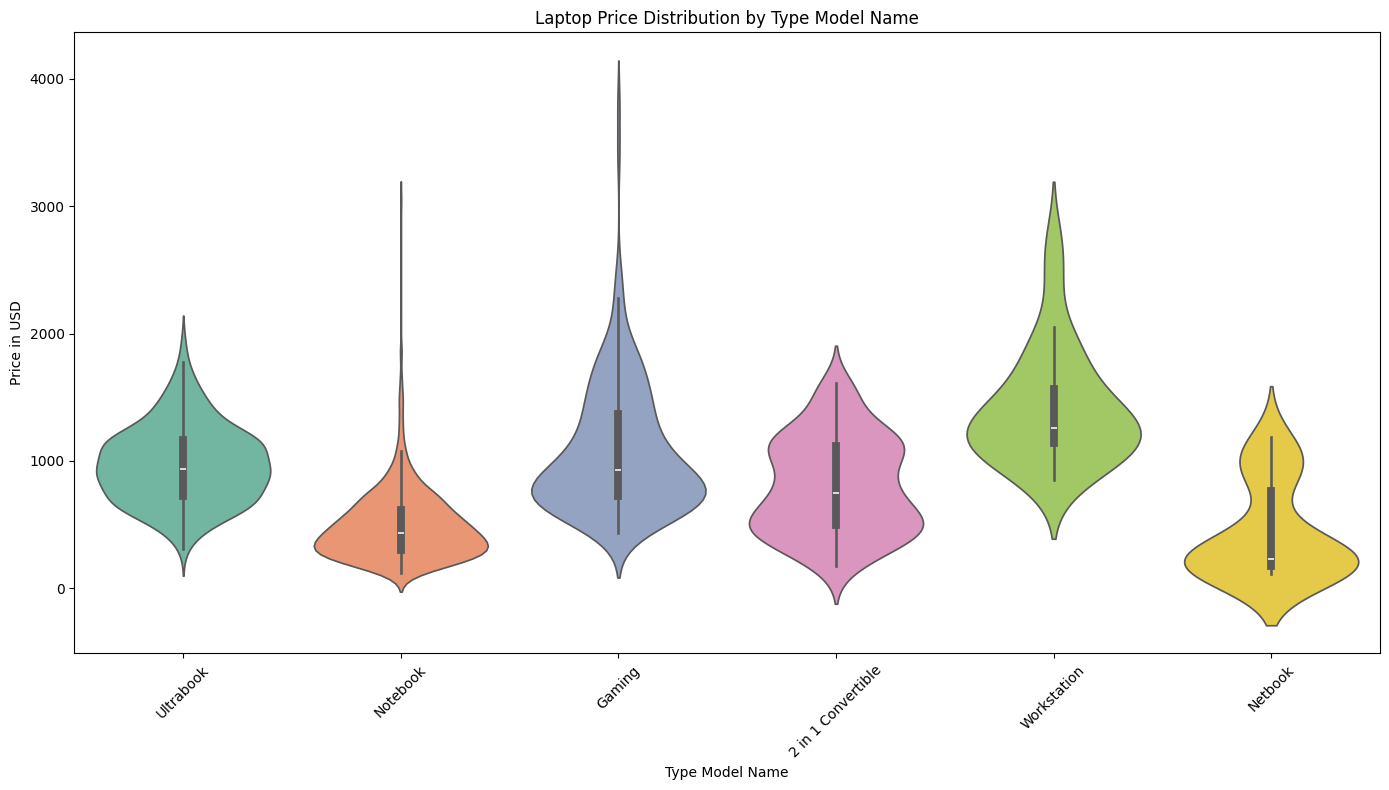

In [52]:
plt.figure(figsize=(14, 8))
sns.violinplot(x='TypeName', y='Price_USD', data=df, palette='Set2')
plt.title('Laptop Price Distribution by Type Model Name')
plt.xlabel('Type Model Name')
plt.ylabel('Price in USD')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("violinplot1.png", dpi=300, bbox_inches='tight')
plt.show()


###How does laptop type (TypeName) affect price?
Gaming  Laptop have  high median Price

/tmp/ipython-input-54-76692955.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TypeName', y='Price_USD', data=df, palette='Set2')


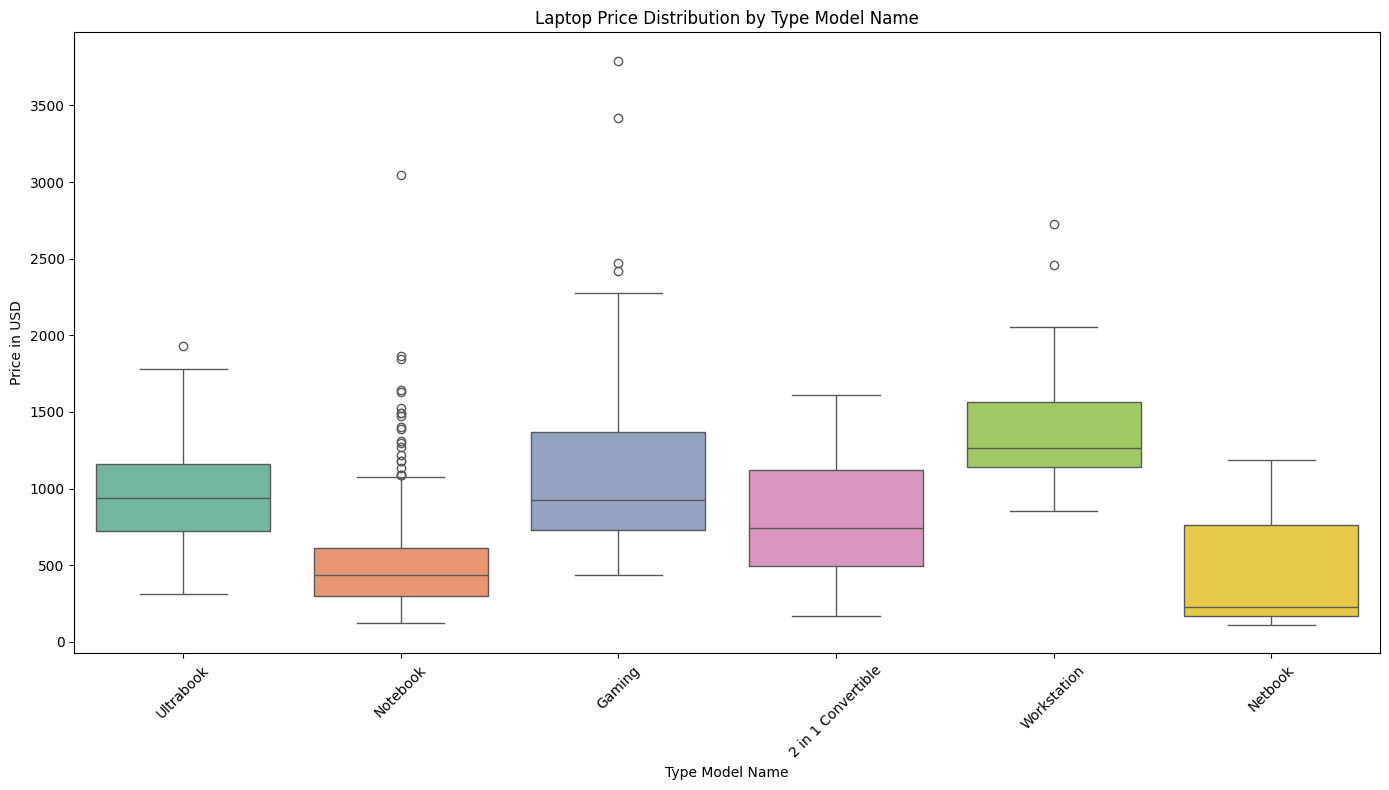

In [54]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='TypeName', y='Price_USD', data=df, palette='Set2')
plt.title('Laptop Price Distribution by Type Model Name')
plt.xlabel('Type Model Name')
plt.ylabel('Price in USD')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("boxplot.png", dpi=300, bbox_inches='tight')
plt.show()


###What is the distribution of laptop prices?

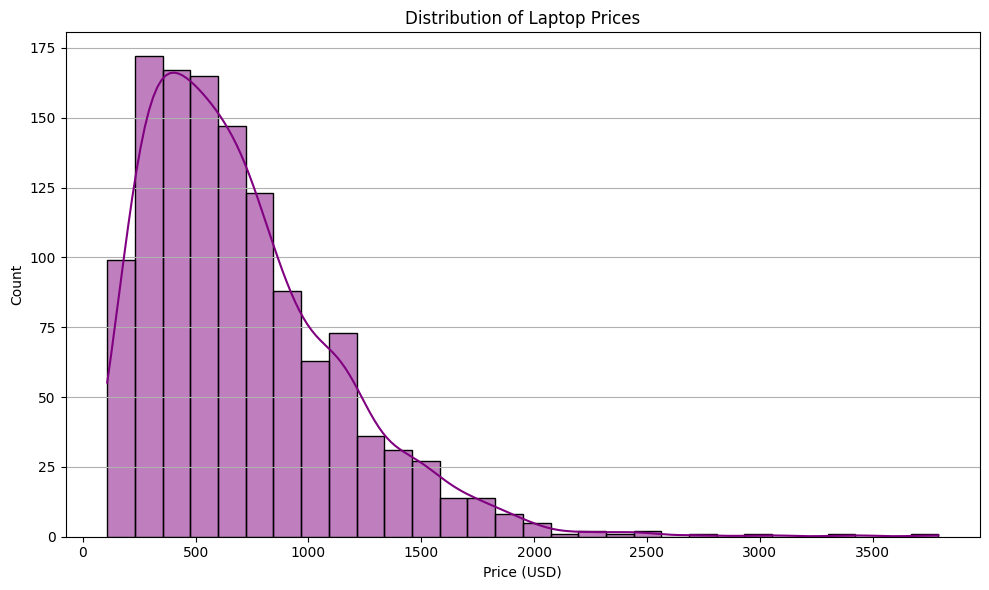

In [55]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Price_USD', bins=30, kde=True, color='purple')
plt.title("Distribution of Laptop Prices")
plt.xlabel("Price (USD)")
plt.ylabel("Count")
plt.grid(axis='y')
plt.tight_layout()
plt.savefig("histplot.png", dpi=300, bbox_inches='tight')
plt.show()



##	Bivariate Analys
###	Does RAM affect the laptop price?
Laptops with higher RAM (from 4GB to 32GB) show a steadily increasing trend in purchases, indicating that consumers prefer devices with more memory

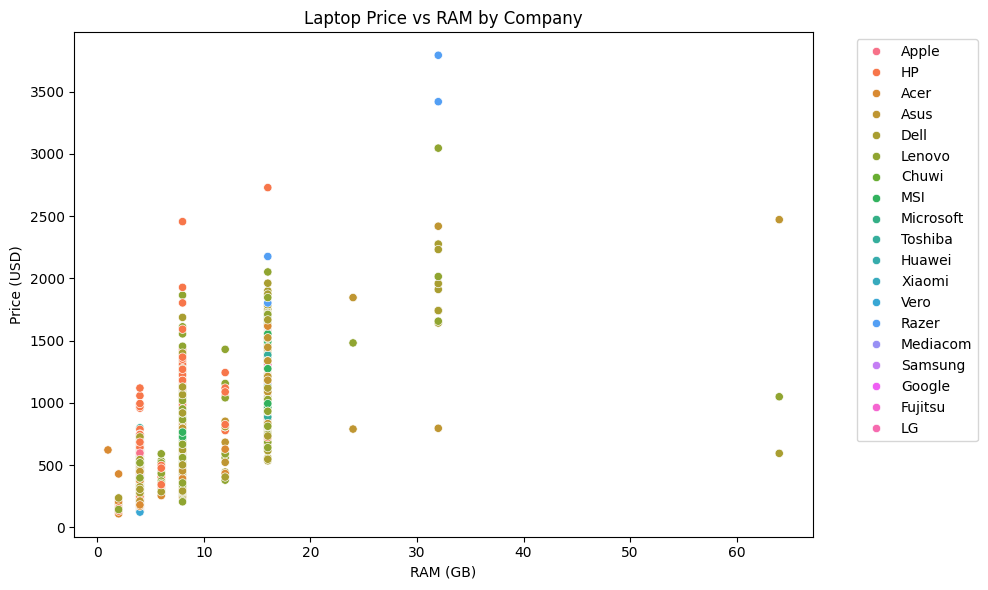

In [56]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Ram', y='Price_USD', data=df, hue='Company')
plt.title('Laptop Price vs RAM by Company')
plt.xlabel('RAM (GB)')
plt.ylabel('Price (USD)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.tight_layout()
plt.savefig("scatterplot.png", dpi=300, bbox_inches='tight')
plt.show()


###Price vs Ram


####Positive Correlation (up to a point):

As RAM increases (from 4 to 32 GB), the price also tends to increase.

Laptops with 8 GB, 16 GB, and 32 GB RAM are more common and have higher price ranges.

This shows a positive relationship — higher RAM → potentially higher price.

/tmp/ipython-input-57-1276436247.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x='Ram', y='Price_USD', data=df, ci='sd', marker='o')


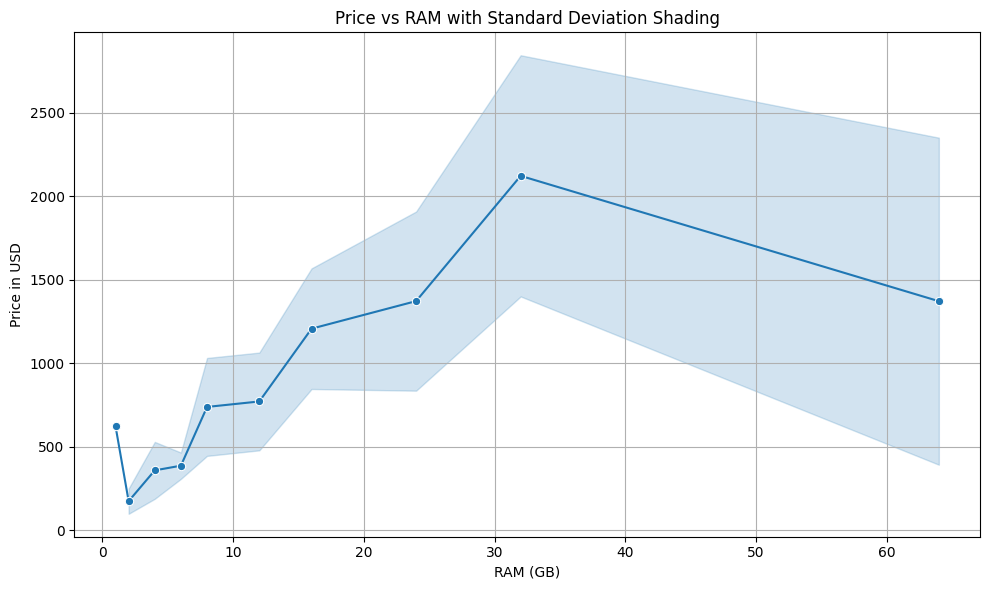

In [57]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Ram', y='Price_USD', data=df, ci='sd', marker='o')
plt.title('Price vs RAM with Standard Deviation Shading')
plt.xlabel('RAM (GB)')
plt.ylabel('Price in USD')
plt.grid(True)
plt.tight_layout()
plt.savefig("lineplot.png", dpi=300, bbox_inches='tight')
plt.show()


Pairplot used numaric colunms can scaterplot anaylsis  relatopnships

###Distribution of Operating Systems

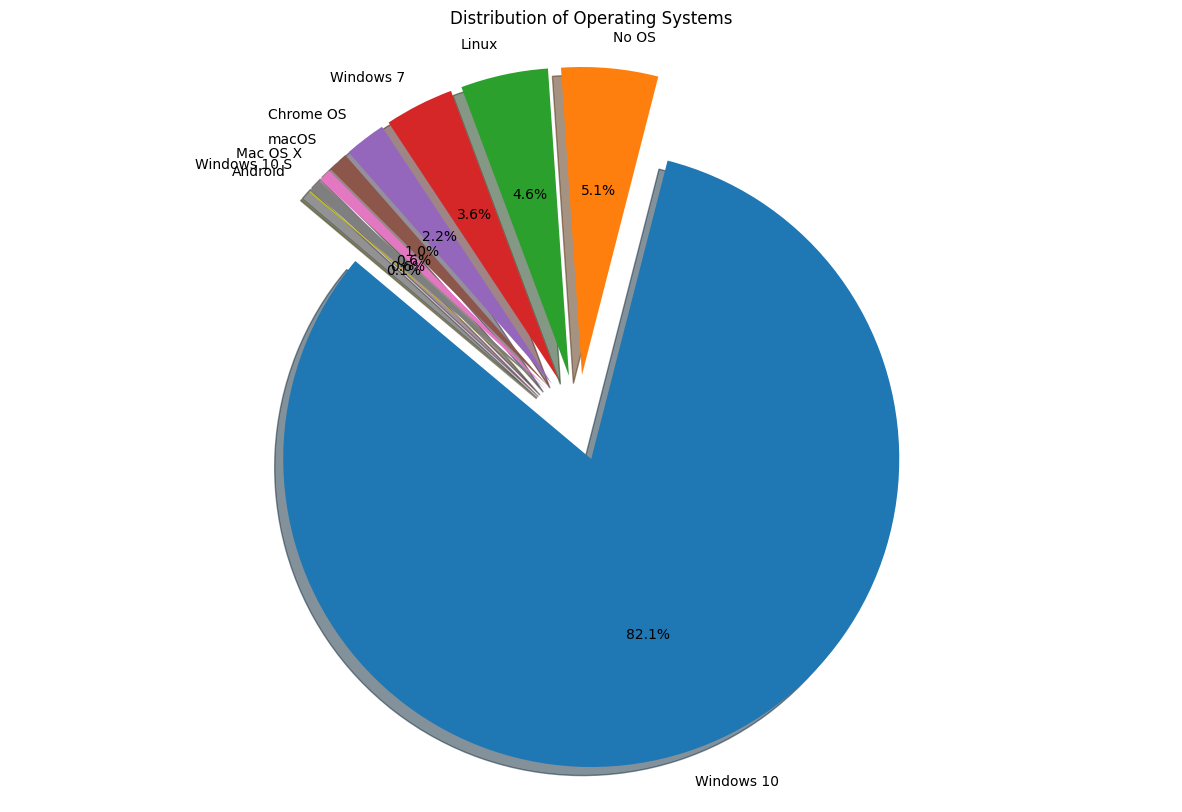

In [81]:
os_counts = df['OpSys'].value_counts()
explode_values = [0.14] * len(os_counts)
plt.figure(figsize=(15, 10))
plt.pie(os_counts,  labels=os_counts.index,  autopct='%1.1f%%',   explode=explode_values,  shadow=True, startangle=140)

plt.title("Distribution of Operating Systems")
plt.axis('equal')
plt.savefig("piechart.png", dpi=300, bbox_inches='tight')
plt.show()


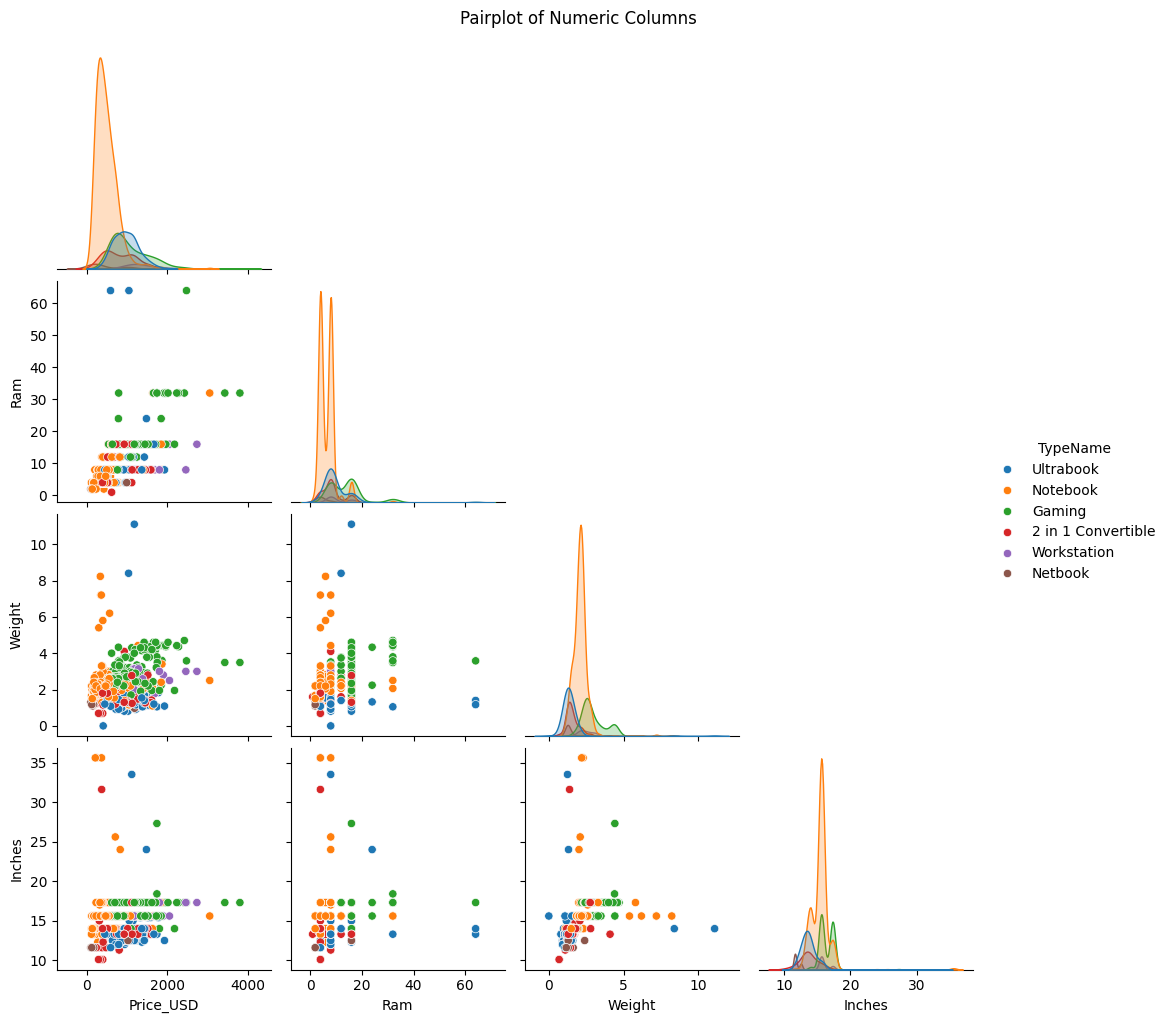

In [58]:
sns.pairplot(df[['Price_USD', 'Ram', 'Weight', 'Inches', 'TypeName']], hue='TypeName',diag_kind='kde', corner=True, height=2.5)
plt.suptitle('Pairplot of Numeric Columns', y=1.02)
plt.savefig("pairplot.png", dpi=300, bbox_inches='tight')
plt.show()

##Correlation Heatmap

##What is the correlation between numeric features?
###Correlation Matrix Insights:-

Inches vs Weight: 0.49 → Bigger laptops tend to be heavier.

Touchscreen vs Weight: -0.25 → Touchscreen laptops are often lighter.

Touchscreen vs Inches: -0.24 → Touchscreen laptops tend to have smaller screens.

Ram vs Weight: 0.29 → More RAM slightly increases laptop weight.


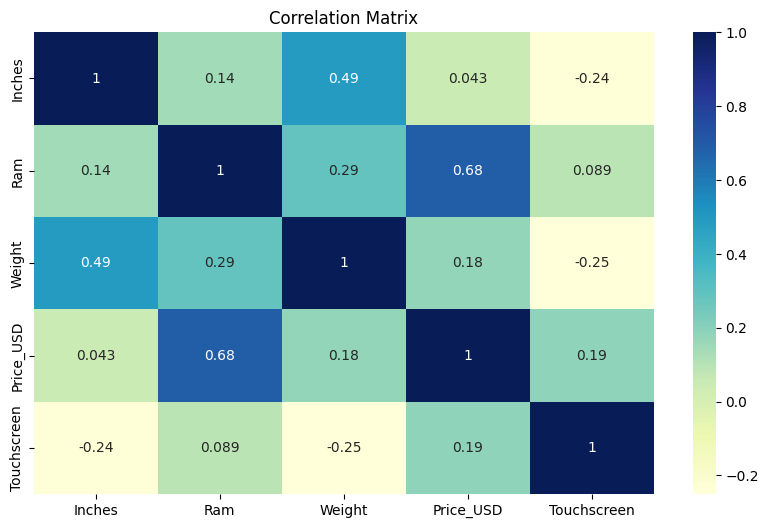

In [85]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix')
plt.savefig("heatmapt.png", dpi=300, bbox_inches='tight')
plt.show()

##📊 Key Insights & Summary
###Here are some valuable insights uncovered from the exploratory data analysis:
Apple laptops are priced highest on average.

Gaming and Workstation models significantly increase price.

SSD presence is a major driver of higher pricing.

Windows is the most used OS, followed by Linux and macOS.

4GB to 32GB RAM: A sharp price increase is observed with increasing RAM.

Pie chart analysis: Windows dominates OS usage, but macOS commands higher prices.

#Conclusion:-
This exploratory data analysis (EDA) on the Laptop Price Dataset has provided meaningful insights into the key features influencing laptop pricing. By analyzing univariate, bivariate, and multivariate relationships, we discovered the following:

###RAM size, laptop type, and SSD presence strongly affect pricing.

###Apple and Workstation laptops are typically priced higher.

##3Touchscreen laptops are generally lighter and have smaller screen sizes.

###Weight increases with screen size and RAM.

###Windows OS dominates the market, followed by macOS and others.



In [59]:
df.to_csv("cleaned_laptops.csv", index=False)
